## Importing necessary libraries for importing the data set

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
path=('/content/drive/MyDrive/Data for analysis/Full Dataset Australian Vehicle Prices Assessment 2 2024 T3.csv')

In [9]:
data=pd.read_csv(path)

In [10]:
data.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4 cyl,SUV,4 Doors,7 Seats,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4 cyl,Hatchback,5 Doors,5 Seats,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4 cyl,Coupe,2 Doors,4 Seats,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8 cyl,Coupe,2 Doors,4 Seats,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4 cyl,SUV,4 Doors,5 Seats,34990


In [11]:
data.describe()

,Year
count,16733.000000
mean,2016.229248
std,5.247705
min,1940.000000
25%,2013.000000
50%,2017.000000
75%,2020.000000
max,2023.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16734 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              16733 non-null  object 
 1   Year               16733 non-null  float64
 2   Model              16733 non-null  object 
 3   Car/Suv            16706 non-null  object 
 4   Title              16733 non-null  object 
 5   UsedOrNew          16733 non-null  object 
 6   Transmission       16733 non-null  object 
 7   Engine             16733 non-null  object 
 8   DriveType          16733 non-null  object 
 9   FuelType           16733 non-null  object 
 10  FuelConsumption    16733 non-null  object 
 11  Kilometres         16733 non-null  object 
 12  ColourExtInt       16733 non-null  object 
 13  Location           16284 non-null  object 
 14  CylindersinEngine  16733 non-null  object 
 15  BodyType           16452 non-null  object 
 16  Doors              151

## Checking teh null values

In [13]:
pd.isnull(data).sum()

,0
Brand,1
Year,1
Model,1
Car/Suv,28
Title,1
UsedOrNew,1
Transmission,1
Engine,1
DriveType,1
FuelType,1


## Dropping Null values.

In [14]:
data.dropna(inplace= True)

### Converting 'Doors', 'Seats', and 'CylindersinEngine' columns to string type before using .str

In [15]:

data['Doors'] = data['Doors'].astype(str)
data['Seats'] = data['Seats'].astype(str)
data['CylindersinEngine'] = data['CylindersinEngine'].astype(str)

data['Doors'] = data['Doors'].str.replace('doors', '', case=False)
data['Seats'] = data['Seats'].str.replace('Seats', '', case=False)
data['CylindersinEngine'] = data['CylindersinEngine'].str.replace('cyl', '', case=False)

## Changing the important feature of data into integers.

In [16]:
data['Price'] = pd.to_numeric(data['Price'], errors='coerce').astype('Int64')

In [17]:
data['Doors'] = pd.to_numeric(data['Doors'], errors='coerce').astype('Int64')
data['Seats'] = pd.to_numeric(data['Seats'], errors='coerce').astype('Int64')
data['Kilometres'] = pd.to_numeric(data['Kilometres'], errors='coerce').astype('Int64')
data['CylindersinEngine'] = pd.to_numeric(data['CylindersinEngine'], errors='coerce').astype('Int64')

## Checking Null values again.

In [18]:
pd.isnull(data).sum()

,0
Brand,0
Year,0
Model,0
Car/Suv,0
Title,0
UsedOrNew,0
Transmission,0
Engine,0
DriveType,0
FuelType,0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14586 entries, 0 to 16733
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Brand              14586 non-null  object 
 1   Year               14586 non-null  float64
 2   Model              14586 non-null  object 
 3   Car/Suv            14586 non-null  object 
 4   Title              14586 non-null  object 
 5   UsedOrNew          14586 non-null  object 
 6   Transmission       14586 non-null  object 
 7   Engine             14586 non-null  object 
 8   DriveType          14586 non-null  object 
 9   FuelType           14586 non-null  object 
 10  FuelConsumption    14586 non-null  object 
 11  Kilometres         14481 non-null  Int64  
 12  ColourExtInt       14586 non-null  object 
 13  Location           14586 non-null  object 
 14  CylindersinEngine  14496 non-null  Int64  
 15  BodyType           14586 non-null  object 
 16  Doors              14586 no

##Removing null values from the Price column.

In [20]:
data.dropna(inplace= True)

In [21]:
data.head()

,Brand,Year,Model,Car/Suv,Title,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,ColourExtInt,Location,CylindersinEngine,BodyType,Doors,Seats,Price
0,Ssangyong,2022.0,Rexton,Sutherland Isuzu Ute,2022 Ssangyong Rexton Ultimate (awd),DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595,White / Black,"Caringbah, NSW",4,SUV,4,7,51990
1,MG,2022.0,MG3,Hatchback,2022 MG MG3 Auto Excite (with Navigation),USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16,Black / Black,"Brookvale, NSW",4,Hatchback,5,5,19990
2,BMW,2022.0,430I,Coupe,2022 BMW 430I M Sport,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472,Grey / White,"Sylvania, NSW",4,Coupe,2,4,108988
3,Mercedes-Benz,2011.0,E500,Coupe,2011 Mercedes-Benz E500 Elegance,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517,White / Brown,"Mount Druitt, NSW",8,Coupe,2,4,32990
4,Renault,2022.0,Arkana,SUV,2022 Renault Arkana Intens,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035,Grey / Black,"Castle Hill, NSW",4,SUV,4,5,34990


In [22]:
data['FuelType'].value_counts()

,count
FuelType,
Unleaded,6214
Diesel,4325
Premium,3051
Hybrid,612
-,145
LPG,14
Leaded,4


In [23]:
data['DriveType'].value_counts()

,count
DriveType,
Front,6416
4WD,3065
AWD,2910
Rear,1972
Other,2


## Histrogram showing the distribution of the data and outliers.

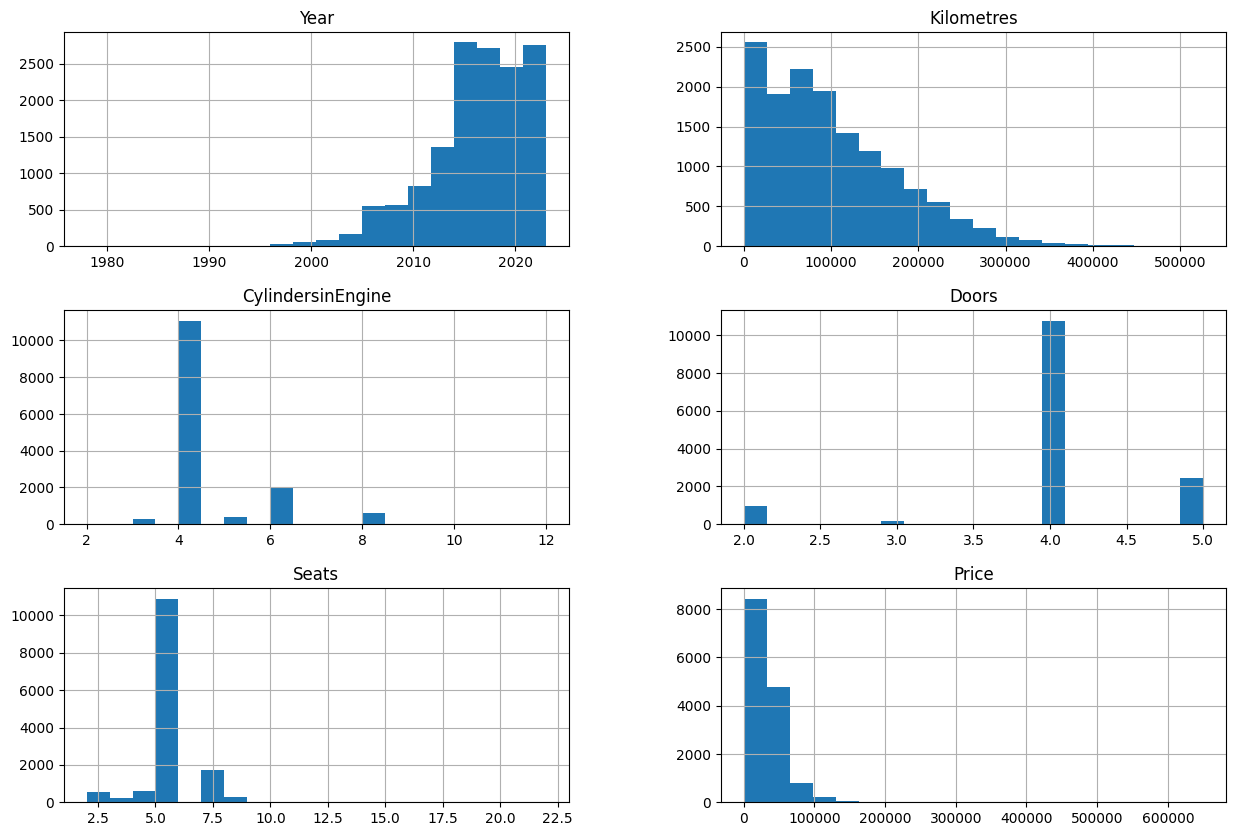

In [24]:
data.hist(figsize=(15,10), bins=20)
plt.show()

## Splitting the data into Training and test data set

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
train_set, test_set= train_test_split(data, test_size=0.2, random_state=42)

In [27]:
train_set.shape, test_set.shape

((11492, 19), (2873, 19))

## Copying the train set into original for future purpose.

In [28]:
data=train_set.copy()

## Correlation with Price: positive correlation with the Year, Kilometers

In [29]:
correlation_matrix= data.corr(numeric_only=True)
correlation_matrix['Price'].sort_values(ascending=False)

,Price
Price,1.000000
Year,0.434222
CylindersinEngine,0.369269
Seats,0.025941
Doors,-0.127608
Kilometres,-0.428896


## Using graph to see the Correlation of the data with labels i.es price

In [30]:
from pandas.plotting  import  scatter_matrix

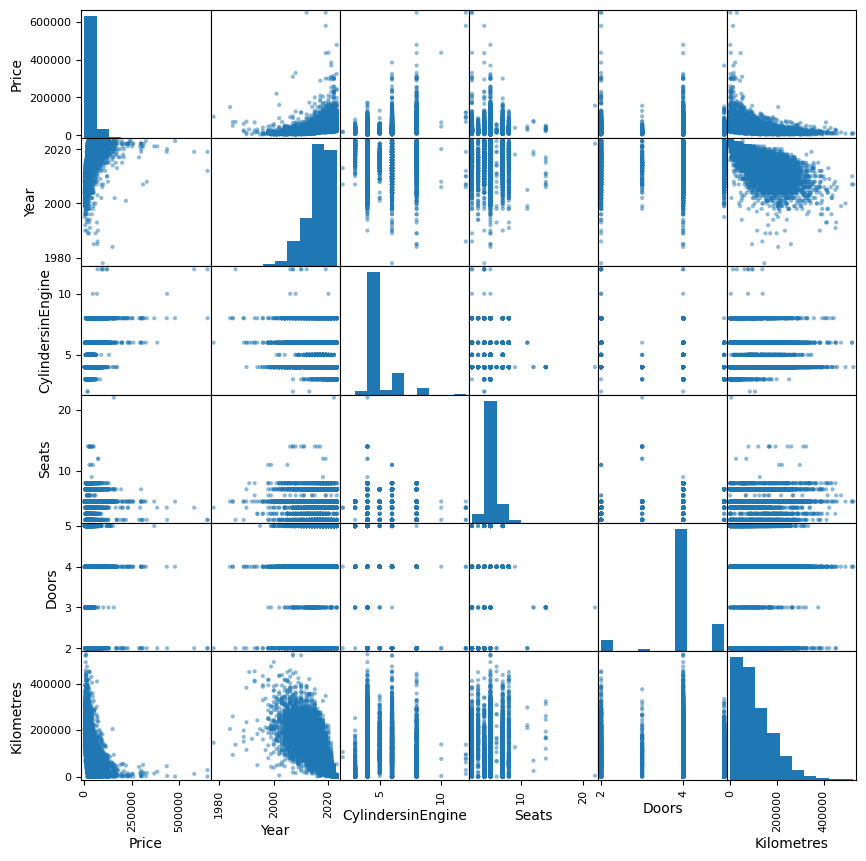

In [31]:
attributes= ['Price', 'Year', 'CylindersinEngine', 'Seats', 'Doors', 'Kilometres']
scatter_matrix(data[attributes], figsize=(10,10))
plt.show()

## Visualizing the correlation between Price and year of the  car manufactured.

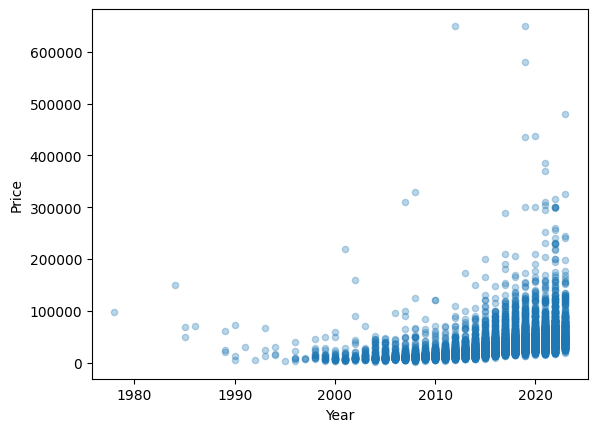

In [32]:
data.plot(kind='scatter', x='Year', y='Price', alpha=0.3)
plt.show()

##Separation of the labels for prediction

In [33]:
data=train_set.drop('Price', axis=1)
data_labels=train_set['Price'].copy()

In [34]:
train_set.shape, test_set.shape

((11492, 19), (2873, 19))

##Feature Scaling and Normalization using Pipeline

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

## Using Mean for the missing values in the dataset if there are using Simple Imputer

In [36]:
from sklearn.impute import SimpleImputer

In [37]:
numerical_pipeline= Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('std_scaler', StandardScaler())
])

## Using ColumnTransformer for adding and converting the data set.

In [38]:
from sklearn.compose import ColumnTransformer

In [39]:
numerical_attributes= ['Year', 'CylindersinEngine', 'Seats', 'Doors', 'Kilometres']
categorical_attributes= ['DriveType', 'Transmission', 'UsedOrNew', 'FuelType']

## One hot Encoder will convert categorial features into arrays.

In [40]:
from sklearn.preprocessing import OneHotEncoder

In [41]:
preprocessing= ColumnTransformer([
    ('numerical', numerical_pipeline, numerical_attributes),
    ('categorical', OneHotEncoder(), categorical_attributes)
])

## FItting all the Changes into the Final data set before prediction and selecting the model.

In [42]:
final_data= preprocessing.fit_transform(data)

In [43]:
final_data.shape

(11492, 23)

## HAving the look into the features.

In [44]:
preprocessing.get_feature_names_out()

array(['numerical__Year', 'numerical__CylindersinEngine',
       'numerical__Seats', 'numerical__Doors', 'numerical__Kilometres',
       'categorical__DriveType_4WD', 'categorical__DriveType_AWD',
       'categorical__DriveType_Front', 'categorical__DriveType_Other',
       'categorical__DriveType_Rear', 'categorical__Transmission_-',
       'categorical__Transmission_Automatic',
       'categorical__Transmission_Manual', 'categorical__UsedOrNew_DEMO',
       'categorical__UsedOrNew_NEW', 'categorical__UsedOrNew_USED',
       'categorical__FuelType_-', 'categorical__FuelType_Diesel',
       'categorical__FuelType_Hybrid', 'categorical__FuelType_LPG',
       'categorical__FuelType_Leaded', 'categorical__FuelType_Premium',
       'categorical__FuelType_Unleaded'], dtype=object)

##Model Selection
#- Lin- Regresssion

In [45]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [46]:
linear_regression= make_pipeline(preprocessing, LinearRegression())
linear_regression.fit(data, data_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['Year', 'CylindersinEngine',
                                                   'Seats', 'Doors',
                                                   'Kilometres']),
                                                 ('categorical',
                                                  OneHotEncoder(),
                                                  ['DriveType', 'Transmission',
                                                   'UsedOrNew',
                                                   'FuelType'])])),
                ('linearregression', LinearRegression())])

In [47]:
linear_regression_pred=linear_regression.predict(data)
linear_regression_pred[:5]

array([15658.50313237, 27207.65720284, 37353.00650763, 54100.35613116,
       48441.08195733])

##Comparing the prediction with the labels.

In [48]:
data_labels[:5].values

<IntegerArray>
[22900, 24990, 34990, 22990, 54888]
Length: 5, dtype: Int64

##Checking the R2.(R-Square.)

In [49]:
from sklearn.metrics import r2_score

In [50]:
r2_regression=r2_score(data_labels, linear_regression_pred)

## The accuracy of Linear regression is 50%

In [51]:
print(r2_regression)

0.5274989801630666


##Selecting the Random FOrrest Regressor for the prediction as there is no linear relation in the data.


In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [53]:
random_forest_reg= make_pipeline(preprocessing,RandomForestRegressor(random_state=42))


## To check the accuracy we are using Corss Validation.

In [54]:
rmses_forest_reg= -cross_val_score(random_forest_reg, data, data_labels, scoring='neg_root_mean_squared_error', cv=10)

In [55]:
r2_forest_scores = cross_val_score(random_forest_reg, data, data_labels, scoring='r2', cv=10)
pd.Series(r2_forest_scores).describe()

,0
count,10.000000
mean,0.735519
std,0.063985
min,0.643551
25%,0.694925
50%,0.732058
75%,0.779636
max,0.827249


##Well, this looks better as the prediction is 70% Accurate.